In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as npr

# Epsilon-greedy approach

In [72]:
# setup

def calc_Q_ta(t,a):
    if N_a[a] > 0:
        return R_ta.sum(0)[a]/N_a[a]
    else:
        return 0
    
def select_A_t(t):
    return Q[t,:].argmax()

### One task

/home/marek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
most frequent choice:  0
best choice:  8


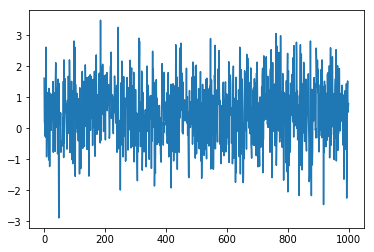

In [212]:
ϵ = 0
n = 10
actions = np.arange(n) # action space
T = 1000

Q_ta = np.zeros((T, n)) # matrix of estimated values
Q_ta[0] = np.random.normal(loc=0, scale=0.01, size=n)
N_a = np.zeros(n) # counter of selections
R_ta = np.zeros((T, n)) # matrix of rewards
choices = np.zeros(T)

q_a = np.random.normal(size=n) # generate true action rewards
avg_reward_t = np.zeros(T)

# iterate over all time
for t in range(T):
    
    # calculate estimated value for each action
    if t>0:
        Q_ta[t, :] = R_ta.sum(0)/N_a
        Q_ta = np.nan_to_num(Q_ta,0)
#     print(f'Q_{t}a: ', Q_ta[t,:])
    
    # select an action
    A_t = Q_ta[t].argmax()
    N_a[A_t] += 1 # add to selection counter
    choices[t] = A_t
#     print('selected action: ', A_t)
#     print(f'N_a: ', N_a)
    
    # get reward
    R_ta[t,A_t] = round(q_a[A_t] + np.random.normal(),2)
#     print(f'R_{t}a: ', R_ta[t,:], '\n')

rewards = R_ta.sum(1)

print(choices[:10])
print('most frequent choice: ', np.unique(choices, return_counts=True)[1].argmax())
print('best choice: ', q_a.argmax())

plt.plot(range(T), rewards)
plt.show()

In [213]:
Q_ta

array([[ 0.02439059, -0.01864711, -0.00853594, ...,  0.02231683,
        -0.01772282, -0.00439581],
       [ 1.62      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.915     ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.48672016,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48675351,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48692693,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [167]:
np.random.seed(1)
M = np.random.randint(10, size = (2,2,2))
print(M)
M[:, 0, :]

[[[5 8]
  [9 5]]

 [[0 0]
  [1 7]]]


array([[5, 8],
       [0, 0]])

### Many tasks

In [215]:
ϵ = 0
n = 10
actions = np.arange(n) # action space
T = 1000
B = 20

Q_ta = np.zeros((B, T, n)) # matrix of estimated values
Q_ta[:, 0, :] = np.random.normal(loc=0, scale=0.01, size=n)
N_a = np.zeros((B,n)) # counter of selections
R_ta = np.zeros((B, T, n)) # matrix of rewards

q_a = np.random.normal(size=(B,n))
avg_reward_t = np.zeros(T)

# iterate over all time
for t in range(T):
    
    # iterate over each task
    for b in range(B):
        
        # calculate estimated value for each action
        if t>0:
            Q_ta[b, t, :] = R_ta[b].sum(0)/N_a[b]
            Q_ta = np.nan_to_num(Q_ta,0)
    #     print(f'Q_{t}a: ', Q_ta[t,:])

        # select an action
        A_t = Q_ta[b, t, :].argmax()
        N_a[b, A_t] += 1 # add to selection counter
    #     print('selected action: ', A_t)
    #     print(f'N_a: ', N_a)

        # get reward
        R_ta[b,t,A_t] = round(q_a[b, A_t] + np.random.normal(),2)
    #     print(f'R_{t}a: ', R_ta[t,:], '\n')


/home/marek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


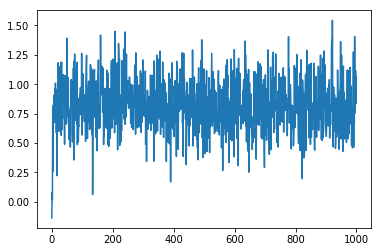

In [216]:
rewards = R_ta.sum(2).mean(0)

plt.plot(range(T), rewards)
plt.show()

### one playe with $\epsilon$

/home/marek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most frequent choice:  4
best choice:  4


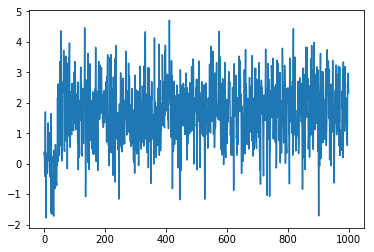

In [253]:
def select_action(t, ϵ=0.01):
    e = np.random.uniform(0,1)
    if e>ϵ:
        return Q_ta[t].argmax()
    else:
        return int(np.random.choice(actions, 1)[0])

n = 10
actions = np.arange(n) # action space
T = 1000

Q_ta = np.zeros((T, n)) # matrix of estimated values
Q_ta[0] = np.random.normal(loc=0, scale=0.01, size=n)
N_a = np.zeros(n) # counter of selections
R_ta = np.zeros((T, n)) # matrix of rewards
choices = np.zeros(T)

q_a = np.random.normal(size=n) # generate true action rewards
avg_reward_t = np.zeros(T)

# iterate over all time
for t in range(T):
    
    # calculate estimated value for each action
    if t>0:
        Q_ta[t, :] = R_ta.sum(0)/N_a
        Q_ta = np.nan_to_num(Q_ta,0)
    
    # select an action
    A_t = select_action(t, ϵ=0.01)
    N_a[A_t] += 1 # add to selection counter
    choices[t] = A_t
    
    # get reward
    R_ta[t,A_t] = round(q_a[A_t] + np.random.normal(),2)
    
rewards = R_ta.sum(1)

print(choices[:10])
print('most frequent choice: ', np.unique(choices, return_counts=True)[1].argmax())
print('best choice: ', q_a.argmax())

plt.plot(range(T), rewards)
plt.show()

### many plays with $\epsilon$

/home/marek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


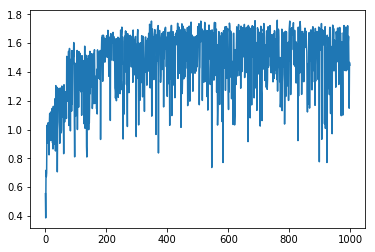

In [259]:
def select_action(b,t, ϵ=0.01):
    e = np.random.uniform(0,1)
    if e>ϵ:
        return Q_ta[b, t, :].argmax()
    else:
        return int(np.random.choice(actions, 1)[0])

n = 10
actions = np.arange(n) # action space
T = 1000
B = 10

Q_ta = np.zeros((B, T, n)) # matrix of estimated values
Q_ta[:, 0, :] = np.random.normal(loc=0, scale=0.01, size=n)
N_a = np.zeros((B,n)) # counter of selections
R_ta = np.zeros((B, T, n)) # matrix of rewards

q_a = np.random.normal(size=(B,n))
avg_reward_t = np.zeros(T)

# iterate over all time
for t in range(T):
    
    # iterate over each task
    for b in range(B):
        
        # calculate estimated value for each action
        if t>0:
            Q_ta[b, t, :] = R_ta[b].sum(0)/N_a[b]
            Q_ta = np.nan_to_num(Q_ta,0)
            
        # select an action
        A_t = select_action(b,t,ϵ=0.1)
        N_a[b, A_t] += 1 # add to selection counter

        # get reward
        R_ta[b,t,A_t] = round(q_a[b, A_t] + np.random.normal(loc=0, scale=0.1),2)

        
rewards = R_ta.sum(2).mean(0)

plt.plot(range(T), rewards)
plt.show()

### Concise code

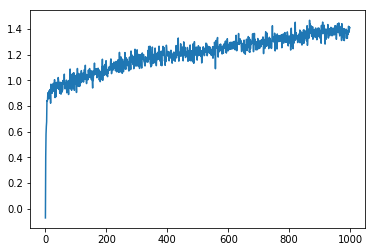

In [416]:
# npr.seed(42)

def select_action(b, ϵ=0):
    e = npr.uniform(0,1)
    if e>ϵ:
        return Q_ba[b, :].argmax()
    else:
        return int(npr.choice(actions, 1)[0])

n = 10
actions = np.arange(n) # action space
T = 1000
B = 200

Q_ba = npr.normal(loc=0, scale=0.01, size=(B,n)) # matrix of estimated values
N_ba = np.zeros((B,n)) # counter of selections
R_ba = np.zeros((B,n)) # sum of rewards in given time

q_a = npr.normal(size=(B,n)) # true rewards

avg_reward_t = np.zeros(T)

# iterate over all time
for t in range(T):
#     print(f'time: {t}')
#     print('='*10)

    # iterate over each task
    R_b = np.zeros(B) # vector of rewards for all plays in given time

    for b in range(B):
#         print('-'*20)
#         print(f'play: {b}')
#         print('-'*20)
#         print('estimated values: ', Q_ba[b])

        # select an action
        A_t = select_action(b, ϵ=0.01)
#         print(f'selected action: {A_t}')
        N_ba[b, A_t] += 1 # add to selection counter
#         print(f'num selection counter: {N_ba[b]}')

        # get reward
        R_b[b] = q_a[b, A_t] + npr.normal(loc=0, scale=0.5)
#         print(f'reward: {R_b[b]}')

        R_ba[b,A_t] += R_b[b]
#         print(f'sum of rewards: {R_ba[b]}')

        # update sample averages
        Q_ba[b, A_t] = R_ba[b, A_t]/N_ba[b, A_t]
#         Q_ba = np.where(Q_ba==np.nan, npr.normal(scale=0.01), Q_ba)
        Q_ba = np.nan_to_num(Q_ba)
#         print(f'updated estimated values: {Q_ba[b]}')

    # save average reward for given time
    avg_reward_t[t] = R_b.mean()

#     print('\n')
#     print('='*50)

plt.plot(range(T), avg_reward_t)
plt.show()

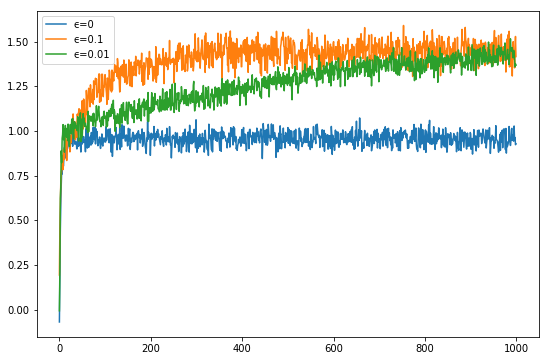

In [41]:
import numpy as np
from numpy import random as npr
import matplotlib.pyplot as plt
    
def simulate_process(ϵ=0):
    
    def select_action(b):
        e = npr.uniform(0,1)
        if e>ϵ:
            return Q_ba[b, :].argmax()
        else:
            return int(npr.choice(actions, 1)[0])

    n = 10
    actions = np.arange(n) # action space
    T = 1000
    B = 200

    Q_ba = npr.normal(loc=0, scale=0.01, size=(B,n)) # matrix of estimated values
    N_ba = np.zeros((B,n)) # counter of selections
    R_ba = np.zeros((B,n)) # sum of rewards in given time

    q_a = npr.normal(size=(B,n)) # true rewards

    avg_reward_t = np.zeros(T)

    # iterate over all time
    for t in range(T):

        # iterate over each task
        R_b = np.zeros(B) # vector of rewards for all plays in given time

        for b in range(B):

            # select an action
            A_t = select_action(b)
            N_ba[b, A_t] += 1 # add to selection counter

            # get reward
            R_b[b] = q_a[b, A_t] + npr.normal(loc=0, scale=0.5)
            R_ba[b,A_t] += R_b[b]

            # update sample averages
            Q_ba[b, A_t] = R_ba[b, A_t]/N_ba[b, A_t]
            Q_ba = np.nan_to_num(Q_ba)

        # save average reward for given time
        avg_reward_t[t] = R_b.mean()
    return avg_reward_t

T = 1000

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(range(T), simulate_process(ϵ=0), label='ϵ=0')
ax.plot(range(T), simulate_process(ϵ=0.1), label='ϵ=0.1')
ax.plot(range(T), simulate_process(ϵ=0.01), label='ϵ=0.01')
ax.legend()

plt.show()

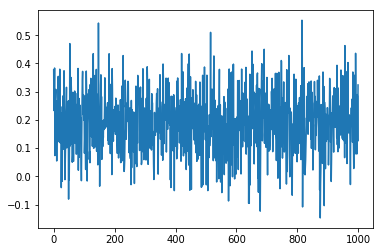

In [39]:
class Process:
    
    def __init__(self, n=10, T=1000, B=200, ϵ=0):
        self.n, self.T, self.B, self.ϵ = n, T, B, ϵ
        self.actions = np.arange(n)
        
        self.Q_ba = npr.normal(loc=0, scale=0.01, size=(B,n)) # matrix of estimated values
        self.N_ba = np.zeros((B,n)) # counter of selections
        self.R_ba = np.zeros((B,n)) # sum of rewards in given time

        self.q_a = npr.normal(size=(B,n)) # true rewards

        self.avg_reward_t = np.zeros(T)
        
#     def select_action(self, b):
#         e = npr.uniform(0,1)
#         if e>self.ϵ:
#             return self.Q_ba[b, :].argmax()
#         else:
#             return int(npr.choice(actions, 1)[0])
        
    def simulate_process(self):
        n, T, B, ϵ, actions = self.n, self.T, self.B, self.ϵ, self.actions
        Q_ba, N_ba, R_ba, q_a = self.Q_ba, self.N_ba, self.R_ba, self.q_a
        avg_reward_t = self.avg_reward_t
        
        def select_action(b):
            e = npr.uniform(0,1)
            if e>self.ϵ:
                return self.Q_ba[b, :].argmax()
            else:
                return int(npr.choice(actions, 1)[0])
        
        for t in range(T):
    
            # iterate over each task
            R_b = np.zeros(B) # vector of rewards for all plays in given time

            for b in range(B):
                # select an action
                A_t = select_action(b)
                N_ba[b, A_t] += 1 # add to selection counter

                # get reward
                R_b[b] = q_a[b, A_t] + npr.normal(loc=0, scale=0.5)        
                R_ba[b,A_t] += R_b[b]

                # update sample averages
                Q_ba[b, A_t] = R_ba[b, A_t]/N_ba[b, A_t]
                Q_ba = np.nan_to_num(Q_ba)

            # save average reward for given time
            self.avg_reward_t[t] = R_b.mean()
    
greedy = Process(B=20)
greedy.simulate_process()

plt.plot(range(greedy.T), greedy.avg_reward_t)
plt.show()

In [32]:
greedy = Process(B=20)
greedy.simulate_process()

plt.plot(range(greedy.T), greedy.avg_reward_t)
plt.show()

NameError: name 'ε' is not defined

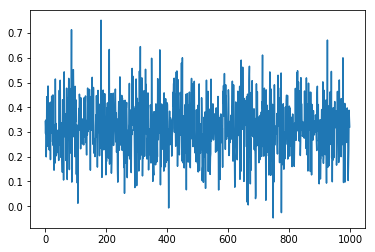

In [400]:
plt.plot(range(greedy.T), greedy.avg_reward_t)
plt.show()

In [28]:
np.random.seed(1)
M = np.random.randint(5, size=(3,3))
print(M)
M.sum(0)[1]
M[1].argmax()

[[3 4 0]
 [1 3 0]
 [0 1 4]]


1